## Fuel Efficiency

In [49]:
#!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [50]:
import pandas as pd
import numpy as np

In [51]:
data=pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [52]:
column_names = ['Mpg','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Origin','Car_name']
raw_dataset = pd.read_csv('auto-mpg.csv', names=column_names, na_values="?", skiprows=1)

data = raw_dataset.copy()
data.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [53]:
data.drop('Origin', axis=1, inplace=True)

In [54]:
miss = pd.DataFrame({'Col_name':data.columns, 'Missing value?': [any(data[x].isnull()) for x in data.columns],
                    'Count_': [sum(data[y].isnull()) for y in data.columns]})

In [55]:
miss.sort_values(by='Count_',ascending=False)

,Col_name,Missing value?,Count_
3,Horsepower,True,6
0,Mpg,False,0
1,Cylinders,False,0
2,Displacement,False,0
4,Weight,False,0
5,Acceleration,False,0
6,Model_Year,False,0
7,Car_name,False,0


In [56]:
data.Displacement.fillna(data.Displacement.mean(), inplace=True)

In [57]:
data.dtypes

Mpg             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_Year        int64
Car_name         object
dtype: object

In [58]:
miss = pd.DataFrame({'Col_name':data.columns, 'Missing Value?': [any(data[x].isnull()) for x in data.columns],
                      'Count_':[sum(data[y].isnull()) for y in data.columns]})

In [59]:
miss.sort_values(by='Count_', ascending=False)

,Col_name,Missing Value?,Count_
3,Horsepower,True,6
0,Mpg,False,0
1,Cylinders,False,0
2,Displacement,False,0
4,Weight,False,0
5,Acceleration,False,0
6,Model_Year,False,0
7,Car_name,False,0


In [60]:
data.Horsepower.fillna(data.Horsepower.mean(), inplace=True)

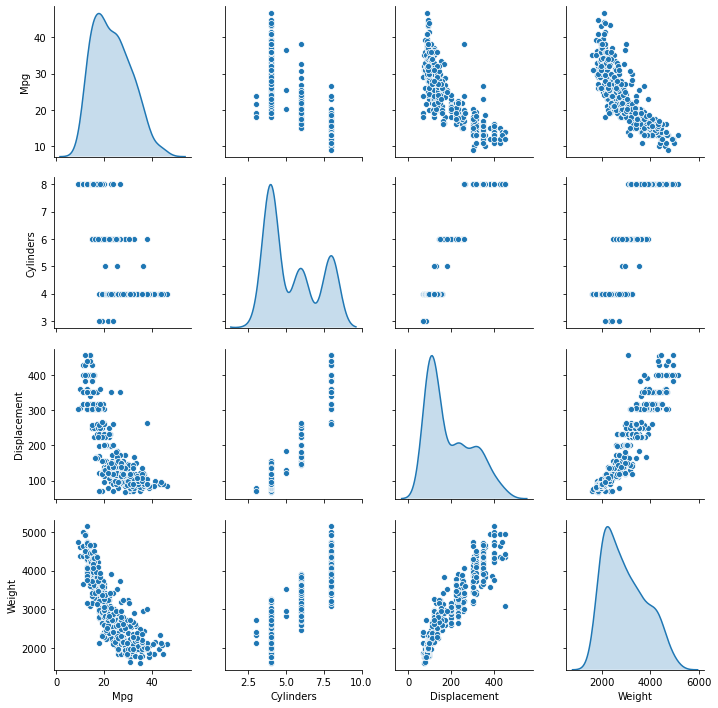

In [61]:
 # Explore the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[["Mpg","Cylinders","Displacement","Weight"]], diag_kind="kde")

In [62]:
stats = data.describe()
stats.pop("Mpg")
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model_Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [63]:
from sklearn.model_selection import train_test_split

X = data.drop("Mpg",axis=1)
y = data.Mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

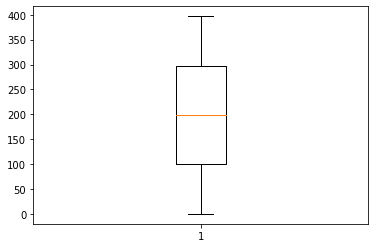

In [64]:
plt.boxplot(data[stats.index].T)
plt.show()

In [65]:
def norm(x):
    return (x - stats['mean']) / stats['std']
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x27f310c3f48>,
 'caps': [<matplotlib.lines.Line2D at 0x27f310bcd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f310c3908>],
 'medians': [<matplotlib.lines.Line2D at 0x27f310bcf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f310c2c88>],
 'means': []}

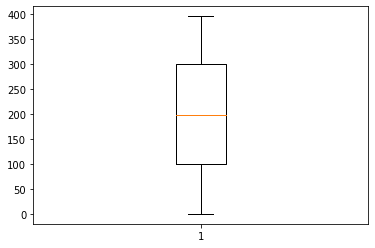

In [66]:
plt.boxplot(normed_train_data[stats.index].T)

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    
    model.compile(loss='mse', 
                  optimizer=optimizer,
                  metrics=['mae','mse'])
    
    return model

In [68]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Building the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
def build_model2():
    model = keras.Sequential([
        layers.Dense(64, activation='sigmoid', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(1)
     ])
        
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    model.compile(loss='mse',
    optimizer=optimizer,
    metrics=['mae', 'mse'])
    
    return model

In [70]:
model2 = build_model2()
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [71]:
EPOCHS = 200
history = model.fit(
normed_train_data, y_train,
epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[tensorflow_docs.modeling.EpochDots(10)])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
EPOCHS = 200
history2 = model2.fit(
 normed_train_data, y_train,
epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[tensorflow_docs.modeling.EpochDots(10)])


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [MPG]')
plt.show()

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1])
plt.ylabel('MSE [MPG^2]')
plt.show()

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history2}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [MPG]')
plt.show()